# Problem Scenario

During Eid festivals, your uncle comes up an idea to start his own bakery business. During the test run phase of his shop, various kind of challenges has been encounter and this troubles your uncle eager to have a solution to get his business back on track. Due to it is a small-scale business, your uncle works out the whole procedure flow by his own, start from taking order from customer until finishing the order. To help your uncle with, you decide to lend technological assistances by developing a software solution using object-oriented programming principles so that your uncle doesn't stress out because of the huge customer flow but instead enjoy running his own business.

Also, as a starting business, your uncle welcome all sort of advices either based on the item or the services.


# Program requirements description

1. User Interface
  - Have a user-friendly for both customers and staff

2. Order Management
	- Able to handle huge amount of customer one-by-one
	- Customer able to view available item in menu and order it
  
3. Item Management
  - Able to add new item
  - Allow staff to edit details(price and availability) of items

4. Customer Feedback
	- Have feedback section after purchased
	- Staff able to view customer feedback

5. User Authentication
 - Some features only accessible by staff

6. Input file
  - A input file for the menu is necessary to run this program

7. Output file
  - A feedback output file will produced

# Problems trying to solve by the program

The problem is solved or improved by using object oriented programming. This program will help uncle easier managing the order, item mainly cakes and cookies and also help him grow his business. The order process will be more efficient and also allow uncle focus more on delivering the best cakes and cookies.

1. Order Management
  - Customer can order using this program with user-friendly menu
  - Features such as adding items to the order, removing items, and calculating the total price is provided
  - While customer is ordering using this program, staff can do other things as well

2. Item Management
  - Uncle as the business owner or the staff can manage item availability and price
  - New item could also be added through this program
  - Password is provided in this program to secure access and prevent unauthorized changes to item availability and prices
  - Customer would know which items is available in the store to prevent confusion or disappointment

3. Customer Feedback
  - After receiving the receipt a simple feedback will be filled by customer
  - Format of the file is rating of item, rating of program and any suggestion for the business
  - This will help uncle gain some insights from customers' suggestions and know more about his customers

4. Sales Report
  - The total sales of the item will be recorded in this program
  - Uncle will know how many items he sold and how much he earn

5. Discount
  - Some certain discount is given to help attracting more customer
  - There are 2 tier list of discount which you spend more than 50 or 150 then 10% discount or 25% discount will be given
  - Another $10 cashback if you purchased more than 2 type of different item

# Problem analysis

Inputs
  - Only one input file that contains all the item and its details is needed
  - Customer need to input number according the menu to order items he wants and run other functions in this program
  - Customer also need to fill up a small feedback form
  - staff have to login password to access the admin function

Outputs
  - One feedback output file will produced
  - Menu that contain available items will be display to customer
  - A receipt will be output to customer with detail of each item he purchased and total price of it

Processes
  - The main object here will be Order
  - Each item details will be read into both Cake and Cookie class before the program output menu
  - Customer add their wanted items into the cart, he could also remove items from his cart
  - Total price will be calculated and also discount will be applied if the conditions are met automatically
  - After receive the receipt and checkout, a feedback form will appear

Constraints
  - Number of customer is pre-declared that is 100 although the amount of customer is uncertain
  - Customer and staff have the same user interface. Staff cannot directly edit the items through a certain login page using password
  - The discount cannot be changed or added when some seasonal promotion day is coming

Assumption
  - 100 customer declared in the array of object

# UML Diagram

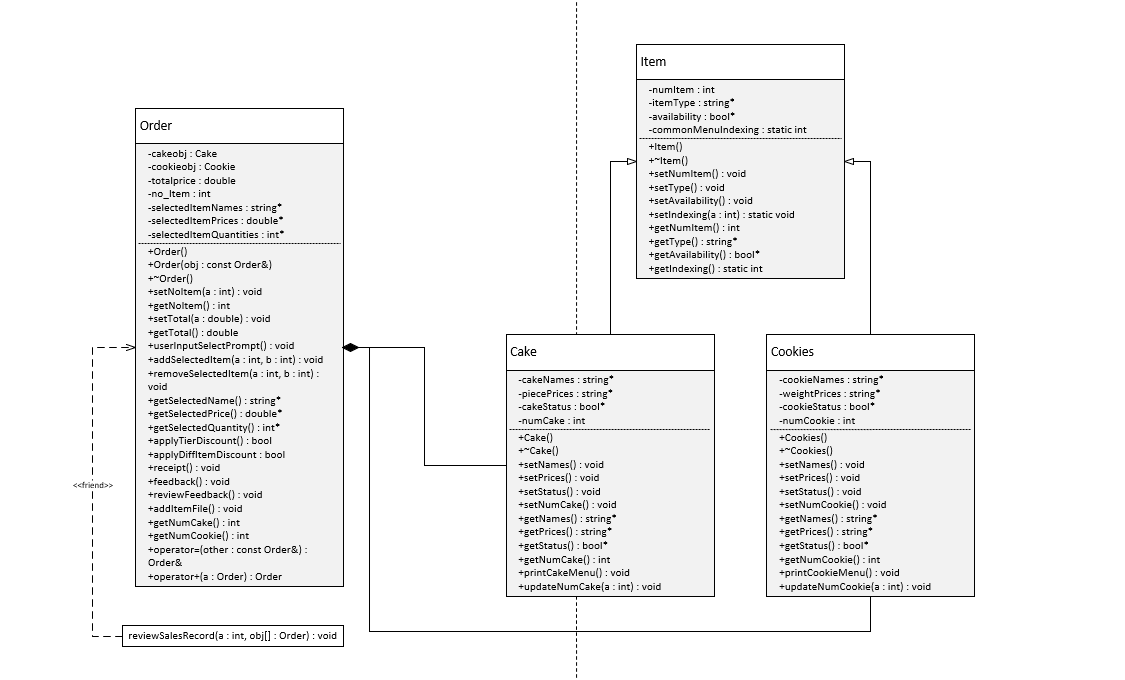

# Input file

Format: Availability itemType Name $price

Reference of cake and cookie names from:

https://polarpuffs-cakes.com/page/article/top-5-popular-hari-raya-treats-to-wow-your-guests-this-eid/

https://kuihraya.sg/2020/03/11/top-10-most-popular-hari-raya-goodies/


In [ ]:
%%writefile inputFile.txt
1 Cake  Chocolate banana Horse Shoe Cake  $23.00
1 Cake  Pineapple Pillows $15.00
1 Cookies Pandan Ketupat Cookies  $10.00
1 Cookies Original Kueh Lapis $12.00
0 Cookies Chocolate Hazelnut Cookies  $10.00
1 Cookies Dahlia Biscuits $8.00
1 Cookies Tapioca Cookies $10.00
1 Cookies Marble Cookies  $8.00
1 Cookies Pineapple Tarts $9.00
1 Cake  Basbousa  $14.00
1 Cake  Malteser Cake $24.00
1 Cake  Pistachio Pudding $11.00
1 Cake  Baklava $17.00
1 Cake  Chocolate Tiramisu  $14.00
0 Cake  Chocolate Brownies  $12.00
1 Cake  Kouign Amann (Brittany's Buttery, Caramelised, Layered Pastry Cake) $25.00
1 Cake  Layali Lubnan (Lebanese Nights, a Semolina Pudding) $18.00
1 Cookies Moroccan Almond Cookies $12.00
1 Cookies Persian Rice Cookies  $12.00
1 Cake  Rhubarb Crumble Cake  $8.00
1 Cake  Semolina Cake   $9.00

Overwriting inputFile.txt


# class Item


Base class Item that has common attributes like number of item, item type (cake or cookie), each item availability, and a int variable to hold indexing number across instance of its objects.

Item class is constructed to read item list from input file and ready for further distributions into more details part.

In [ ]:
%%writefile Item.h
#ifndef ITEM_H
#define ITEM_H
#include <iostream>
#include <fstream>
using namespace std;

class Item{
  private:
    int numItem;          //total how many item in input file
    string* itemType;         //differentiate cake/cookie
    bool* availability;         //available for sales or not
    static int commonMenuIndexing;    //static variable that remain through cake and cookie class for menu indexing purpose

  public:
    int getNumItem();         //Accessor function
    string* getType();
    bool* getAvailability();
    static int getIndexing();

    Item();         //Constructor that initialize setup from input file
    ~Item();        //Destructor

    void setNumItem();          //All mutator takes no arg as it read from the input file
    void setType();
    void setAvailability();
    static void setIndexing(int a);     //static mutator take takes arg so that it can update indexing it used up until
};
#endif

Overwriting Item.h


In [ ]:
%%writefile Item.cpp
#include "Item.h"
#include <iostream>
#include <fstream>
using namespace std;

int Item :: commonMenuIndexing = 0 ; //intialize to 0 for the very first time only

                      //Definition of all accessor function
int Item :: getNumItem()
{ return numItem;}

string* Item :: getType()
{ return itemType;}

bool* Item :: getAvailability()
{ return availability;}

int Item::getIndexing()
{ return commonMenuIndexing; }




Item :: Item ()         //Constructor that initially set numItem, itemType, availability from input file
{
  setNumItem();
  setType();
  setAvailability();
}

Item :: ~Item()           //Destuctor that delete dynamically allocated storage
{
  delete []itemType;
  delete []availability;
}



void Item :: setNumItem() // To know array size from total records in input file
{
  int rowCounts= 0;
  string temp;          //temporary variable

  ifstream inFile;
  inFile.open("inputFile.txt");         //Open input file for reading purpose

  if (!inFile)            //Test for file opening error
  {
    cout<<"File open error. Please make sure input file desired exist under the same folder."<<endl;
    numItem =  rowCounts;
  }
  else
  {
    while(getline(inFile,temp))   //read by line in input file
    {
      rowCounts++ ;
    }
    numItem =  rowCounts;
  }
  inFile.close();
}

void Item :: setType()
{
  itemType = new string [numItem];
  int i = 0 ;               //loop counter
  string temp;                  //temporary variable that used to stor undesired data

  ifstream inFile;
  inFile.open("inputFile.txt");           //Open input file for reading purpose

  if (!inFile)              //Test for file opening error
  {
    cout<<"File open error. Please make sure input file desired exist under the same folder."<<endl;
  }
  else
  {
    while(inFile>>temp)
    {
      inFile>>itemType[i];            //extract item type from the input file format
      getline(inFile,temp);
      i++;
    }
  }
  inFile.close();
}

void Item ::setAvailability()
{
  availability = new bool[numItem];
  int i = 0 ;                 //loop counter
  string temp;                //temporary variable that used to stor undesired data

  ifstream inFile;
  inFile.open("inputFile.txt");       //Open input file for reading purpose

  if (!inFile)                  //Test for file opening error
  {
    cout<<"File open error. Please make sure input file desired exist under the same folder."<<endl;
  }
  else
  {
    while(inFile>>availability[i])        //extract availability from input file format
    {
      getline(inFile,temp);
      i++;
    }
  }
  inFile.close();
}

void Item::setIndexing(int a )      //mutator function for static variable commonMenuIndexing
{
  commonMenuIndexing = a;
}

Overwriting Item.cpp


# Item derived class Cake

Class Cake is inherited from base class Item that hold the details of item type cake. This class further categorize item into cake by names, price per piece, cake's availability, and total number of cake.

It prepare cake item for future use in customer ordering and admin operation.

In [ ]:
%%writefile Cake.h
#ifndef CAKE_H
#define CAKE_H
#include <iostream>
#include "Item.h"
using namespace std ;

//Inheritance class from Item

class Cake : public Item{
  private:
    string* cakeNames;        //pointer to cake names
    string* piecePrices;        //pointer to cake price per pieces
    bool* cakeStatus;         //pointer to cake availability
    int numCake;          //total number of cake
  public :
    //Mutator here is to categorize item to cakes
    void setNames();       //set cake names
    void setPrices();       //set cake prices
    void setStatus();         //set cake availability
    void setNumCake();        //set initialize number of cake regardless of availability

    void updateNumCake(int a);      //set numCake to cakes status available only

    string* getName();        //get names of each cake
    string* getPrice();         //get price per pieces for each cake
    bool* getStatus();        //get availability status of each cake
    int getNumcake();         //get number of cake

    ~Cake();          //setup initialize of categorize item into cake
    Cake();           //free up storage of pointer

    void printCakeMenu();       //Print cake menu based on availability
};
#endif

Overwriting Cake.h


In [ ]:
%%writefile Cake.cpp
#include "Item.h"
#include "Cake.h"
#include <iomanip>
using namespace std;

void Cake :: setNames()
{
  string temp;
  cakeNames = new string [numCake];   //DMA for cakeNames

  ifstream inFile;
  inFile.open("inputFile.txt");       //Open file for reading purpose

  if (!inFile)          //Test for file opening error
  {
    cout<<"File open error. Please make sure input file desired exist under the same folder."<<endl;
  }
  else
  {
    int i = 0;
    while (inFile>>temp)    //using while loop instead of for loop , to make sure only when desired variable is stor then indexing will update.
    {                     //no storage been wasted as array indexing are used without null in between
      inFile>>temp;
      if(temp =="Cake")           //only if the temp read is Cake, the following string until '$' will be stor as cake names
      {
        getline(inFile,cakeNames[i],'$');
        i++;
      }
      getline(inFile,temp);
    }
  }
  inFile.close();
}

void Cake :: setPrices()
{
  string temp;
  piecePrices = new string [numCake]; //DMA for piecePrices

  ifstream inFile;
  inFile.open("inputFile.txt");  //Open file for reading purpose

  if (!inFile)                //Test for file opening error
  {
    cout<<"File open error. Please make sure input file desired exist under the same folder."<<endl;
  }
  else
  {
    int i = 0;
    while (inFile>>temp)
    {
      inFile>>temp;
      if(temp =="Cake")                 //Only when the type read is Cake, following string from '$' will be stor as piecePrices
      {
        getline(inFile,temp,'$');
        inFile>>piecePrices[i];
        i++;
      }
    }
  }
  inFile.close();
}

void Cake :: setStatus()
{
  cakeStatus = new bool [getNumItem()];       //DMA for cakeStatus

  bool* tempStatus = getAvailability();         //get availability from Base class Item

  string* tempType = getType();           //get item type from Base class Item

  int indexing = 0;

  for (int i = 0 ; i < getNumItem(); i++)     //showing here using a for loop, to avoid waste of storage that leaving null between an array
  {                                     // will need and external counter when the desired variable is stor, then it will update by +1
    if(*(tempType+i)=="Cake")           //Only when type read is Cake , the availability of item will stor as cake status
    {
      cakeStatus[indexing]= *(tempStatus+i);
      indexing++;
    }
  }
}

void Cake :: setNumCake()               // to set number of cake from list of items
{
  numCake = 0;
  string* type = getType();
  for (int i = 0 ; i < getNumItem(); i++)
  {
    if (*(type+i)== "Cake")             //only when type is cake, numCake increase by 1
    {
      numCake++;
    }
  }
}

void Cake :: updateNumCake(int a)         // for further update on numCake when it takes only cake thats only available
{ numCake = a ; }

//Accessor Functions
string* Cake ::getName()
{ return cakeNames;}

string* Cake :: getPrice()
{ return piecePrices;}

bool* Cake:: getStatus()
{ return cakeStatus;}

int Cake :: getNumcake()
{ return numCake;}


//Constructor that initialize Cake class variable form Item class
Cake::Cake()
{
  setNumCake();
  setNames();
  setPrices();
  setStatus();
}

//Destructor that delete DMA after used
Cake :: ~Cake()
{
  delete [] cakeNames;
  delete [] piecePrices;
  delete [] cakeStatus;
}


//Print cake menu of cake that is only availability is set to 1
void Cake::printCakeMenu()
{
  int indexing = 0;
  cout<<"----------------------------------------------------------------------------------------------------------"<<endl;
  cout<<setw(50)<<"Cake Menu"<<endl;
  cout<<"----------------------------------------------------------------------------------------------------------"<<endl;

                          //Make a copy of cake names, prices,status
  string copyNames[numCake];
  string copyPrices[numCake];
  string copyStatus[numCake];

  for (int i = 0 ; i <numCake ; i++) //deep copy
  {
    copyNames[i]= cakeNames[i];
    copyPrices[i] = piecePrices[i];
    copyStatus[i] = cakeStatus[i];
  }

  for (int i = 0 ; i<numCake;i++)
  {
    if(*(cakeStatus+i)!= 0)         //display when status != 0
    {
      cout<<"("<<indexing+1<<") "<<setw(70)<< left <<copyNames[i]<<right<<"- - - - - - - - - - $ "<<copyPrices[i]<<endl;

      //Exclude the non-available cake from the array
      cakeNames[indexing] = copyNames[i];
      piecePrices[indexing] = copyPrices[i];
      cakeStatus[indexing] = cakeStatus[i];
      indexing++;
    }

  }
  setIndexing(indexing);        //Pass the indexing to cookie class so that the common menu used consecutive index number
  updateNumCake(indexing);        //update number of cake thats available
  cout<<"\n\n";
}

Overwriting Cake.cpp


# Item derived class Cookies


Class Cookie is inherited from base class Item that hold the details of item type cookie. This class tends to distribute the item into cookie by names , price per weight(100g),cookie's availability and total number of cookie.

It prepare cookie items for future use in customer ordering and admin related operation.

In [ ]:
%%writefile Cookies.h
#ifndef COOKIES_H
#define COOKIES_H
#include <iostream>
#include "Item.h"
using namespace std ;

class Cookies : public Item{
  private:
    string* cookieNames;        //pointer to cookie name
    string* weightPrices;        //pointer to cookie price per weight
    bool* cookieStatus;         //pointer to cookie availability
    int numCookie;          //number of cookie
  public :
  //Mutator here is to categorize item to cookie
    void setNames();       //set cookie names
    void setPrices();       //set cookie prices
    void setStatus();         //set cookie availability status
    void setNumCookie();        //set number of cookie from the list of item

    string* getName();        //get cookie names
    string* getPrice();         //get cookie price per piece
    bool* getStatus();        //get cookie status
    int getNumcookie();         //get number of cookie

    ~Cookies();             //free up pointer storage
    Cookies();            //setup initialize of categorize item into cookie

    void updateNumCookie(int a);      //set numCookie to cookies status available only
    void printCookieMenu();       //done
};
#endif

Overwriting Cookies.h


In [ ]:
%%writefile Cookies.cpp
#include "Item.h"
#include "Cookies.h"
#include <iomanip>
using namespace std;

void Cookies :: setNames()
{
  string temp;
  cookieNames = new string [numCookie];

  ifstream inFile;            //open file for reading
  inFile.open("inputFile.txt");

  if (!inFile)              //test for file opening error
  {
    cout<<"File open error. Please make sure input file desired exist under the same folder."<<endl;
  }
  else
  {
    int i = 0;
    while (inFile>>temp)
    {
      inFile>>temp;
      if(temp =="Cookies")      //only save into cookieNames array if the type is cookie
      {
        getline(inFile,cookieNames[i],'$');
        i++;
      }
      getline(inFile,temp);
    }
  }
  inFile.close();
}

void Cookies :: setPrices()
{
  string temp;
  weightPrices = new string [numCookie];

  ifstream inFile;            //open file for reading purpose
  inFile.open("inputFile.txt");

  if (!inFile)              //test for file opening error
  {
    cout<<"File open error. Please make sure input file desired exist under the same folder."<<endl;
  }
  else
  {
    int i = 0;
    while (inFile>>temp)
    {
      inFile>>temp;
      if(temp =="Cookies")
      {
        getline(inFile,temp,'$');
        inFile>>weightPrices[i];          //extract cookie price per weight by reading string after '$'
        i++;
      }
    }
  }
  inFile.close();
}

void Cookies :: setStatus()
{
  cookieStatus = new bool [getNumItem()];

  bool* tempStatus = getAvailability();     //get item availability from base class Item

  string* tempType = getType();           //get item type from base class Item

  int indexing = 0;                 //variable that hold indexing value that only increase when an array cookieStatus is added

  for (int i = 0 ; i < getNumItem(); i++)
  {
    if(*(tempType+i)=="Cookies")        //when the type read is Cookies ,then the following availability will be save as that cookie's status
    {
      cookieStatus[indexing]= *(tempStatus+i);
      indexing++;
    }
  }
}

void Cookies :: setNumCookie()        //extract number of type cookie from item type of base class Item
{
  numCookie = 0;
  string* type = getType();       //get item type from base class Item
  for (int i = 0 ; i < getNumItem(); i++)
  {
    if (*(type+i)== "Cookies")
    {
      numCookie++;
    }
  }
}

//Assesor functions
string* Cookies ::getName()
{ return cookieNames;}
string* Cookies :: getPrice()
{ return weightPrices;}

bool* Cookies:: getStatus()
{ return cookieStatus;}
int Cookies :: getNumcookie()
{ return numCookie;}


//Destructor that free up DMA storage after used
Cookies :: ~Cookies()
{
  delete [] cookieNames;
  delete [] weightPrices;
  delete [] cookieStatus;
}
//Constroctor that setup initialization of categorize item list into cookies
Cookies::Cookies()
{
  setNumCookie();
  setNames();
  setPrices();
  setStatus();
}

//Used to update number of cookie that status of availability is available
void Cookies :: updateNumCookie(int a)
{ numCookie = a ; }


//Print cookie menu that display only available cookie for sales
void Cookies::printCookieMenu()
{
  int tempIndex = getIndexing();
  int nameIndexing = 0;
  cout<<"----------------------------------------------------------------------------------------------------------"<<endl;
  cout<<setw(50)<<"Cookies Menu"<<endl;
  cout<<"----------------------------------------------------------------------------------------------------------"<<endl;

  string copyNames[numCookie];
  string copyPrices[numCookie];
  string copyStatus[numCookie];

  //Make a copy of cookie names, prices,status
  for (int i = 0 ; i <numCookie ; i++) //deep copy
  {
    copyNames[i]= cookieNames[i];
    copyPrices[i] = weightPrices[i];
    copyStatus[i] = cookieStatus[i];
  }

  for (int i = 0 ; i<numCookie;i++)
  {
    if(*(cookieStatus+i)!= 0) //if cookie is available, print it to menu
    {
      cout<<"("<<getIndexing()+1<<") "<<setw(70)<< left <<copyNames[i]<<right<<"- - - - - - - - - - $ "<<copyPrices[i]<<endl;
      //Exclude the non-available cookie from the array
      cookieNames[nameIndexing] = copyNames[i];
      weightPrices[nameIndexing] = copyPrices[i];
      cookieStatus[nameIndexing] = cookieStatus[i];
      //get current common indexing for menu that continue the index from cake menu
      tempIndex= getIndexing();
      tempIndex++;          //increase it by 1 every cycle of printing a cookie item to menu
      //pass the current indexing back to update the common indexing
      setIndexing(tempIndex);
      nameIndexing++;           //increase by 1 to ready for next cookie item
    }

  }
  ////update number of cookie thats available
  updateNumCookie(nameIndexing);
  cout<<"\n\n";
}

Overwriting Cookies.cpp


# class Order (composite of Cake Cookies)

A feedback text file that contains header to receive feedback from customers. The format of the feedback file is rate of item, rate of program and suggestion, all separated with comma(',').

In [ ]:
%%writefile feedback.txt
rating_of_item,rating_of_program,other_suggestion

Overwriting feedback.txt


Class Order that composite of both derived cake and cookie class.

Order class hold customer selected item's details into cart and always update the totalprice and number of item that is in cart currently. It also contain feedback function that receive rating and suggestion from customer and output in a certain format into a feedback text file. Staff can review it in a more clearer way the program output through the file.

Other than that, staffs can add new Items with relative information into the main menu via editing the file that used to store menu information by using addItemFile function. Staffs are also able to review on total sales information through a friend function which have access to the private member of Order class. In this function, staff as admin will have a look on total number of customers, total sales and total quantities of sold items.

Remark that no individual setter function is used for defining selected item names,price and quantity. Customer is required to enter its quantity when selected the specific item.

In [ ]:
%%writefile Order.h
#ifndef ORDER_H
#define ORDER_H

#include "Item.h"
#include "Cake.h"
#include "Cookies.h"
#include <iostream>
using namespace std;

class Order{
  private:
    Cake cakeobj;       //composite of Cake class and Cookie class
    Cookies cookieobj;

    double totalprice;      //variable that hold the total price of items in cart
    int no_Item;          //variable that represent how many item is in cart

    string* selectedItemNames;    //variable that stor user selected item names
    double* selectedItemPrices;     //variable that stor user selected item prices
    int* selectedItemQuantities;      //variable that stor user entered quantity of that item

  public:
    Order(); //default constructor
    Order(const Order &obj); //copy constructor
    ~Order(); //destructor

    //Accessor and mutator function to retain no_Item and totalprice
    void setNoItem(int a);
    int getNoItem();
    void setTotal(double a);
    double getTotal();

    void userInputSelectPrompt();         //Display menu of cake and cookie as a whole consecutive menu
    void addSelectedItem(int a ,int b);       //After user select item, stor the details into corresponding variable
    void removeSelectedItem(int a , int b);       //After user choose to remove items, clean the corresponding details from variable

    //Accessor functions for user selected item names,prices,quantities
    string* getSelectedName();
    double* getSelectedPrice();
    int* getSelectedQuantity();

    bool applyTierDiscount();   //Discount is given if purchased certain amount of money
    bool applyDiffItemDiscount();   //Discount is given if purchased different type of item
    void receipt();
    void feedback();

    void reviewFeedback();      //Admin can review the feedback from customer
    void addItemFile();     //Admin can add new items to main menu by modifying input file
    friend void reviewSalesRecord(int userCount, Order obj[]);      //Admin can review total sales record during program operation

    int getNumCake();     //Accessor function for number of cake
    int getNumCookie();     //Accessor function for number of cookie

    //Operator overloading
    Order& operator=(const Order& other);
    Order operator+(Order a);
};

#endif

Overwriting Order.h


In [ ]:
%%writefile Order.cpp
#include "Item.h"
#include "Order.h"
#include "Cake.h"
#include "Cookies.h"
#include <iostream>
#include <iomanip>
using namespace std;

void Order :: removeSelectedItem(int a , int b)
{
  a--;
  *(selectedItemQuantities+a) = *(selectedItemQuantities+a) - b;    //first try quantiti deduct by b to determine further operation

  if ((a>=getNoItem())||(a<=-1) ) //if there is no item added yet and the cart is empty
  {
    cout<<"No such item in cart. Please make sure u enter correct input."<<endl;
  }
  else if ( (*(selectedItemQuantities+a)<=0) && (getNoItem()==1) )    //when the item on cart is just one and quantities all been removed , just empty it
  {
    *(selectedItemNames+a) = "";
    totalprice = 0;
    *(selectedItemPrices+a) = 0;
    *(selectedItemQuantities+a) = 0;
    setNoItem(-1);              //no of item in cart reduce by 1
  }
  else if (*(selectedItemQuantities+a)<=0) // remove whole records and move elements after it forward
  {                       //After desired removed quantities applied, whole record of the item in cart disappear
    totalprice = totalprice - *(selectedItemPrices+a);
    for (int i = 0 ;i<(getNoItem()-a); i++,a++)
    {
      //start from selected item, move item after it forward
      *(selectedItemNames+a) = *(selectedItemNames+(a+1));
      *(selectedItemPrices+a) = *(selectedItemPrices+(a+1));
      *(selectedItemQuantities+a) = *(selectedItemQuantities+(a+1));
    }
    //then the last item is the one removed , make it empty
    *(selectedItemNames+a) = "";
    *(selectedItemPrices+a) = 0;
    *(selectedItemQuantities+a) = 0;
    setNoItem(-1);            //no of item in cart reduce by 1
  }
  else                    // after removed there is still quantities remained, just deduct the total price and single item's total
  {
    totalprice = totalprice - ( *(selectedItemPrices+a)/ (*(selectedItemQuantities+a)+ b))*b ;
    *(selectedItemPrices+a) = *(selectedItemPrices+a) - ( *(selectedItemPrices+a)/ (*(selectedItemQuantities+a)+ b))*b;
  }


  cout<<"------------------------------------------------------------------------------------------------------------------------"<<endl;
  cout<<"                   Cart"<<endl;
  cout<<"------------------------------------------------------------------------------------------------------------------------"<<endl;

  for (int c = 0 ; c<getNoItem();c++)
  {
    if (*(selectedItemNames+c) != "") //do not display when it is empty
    {
      cout<<c+1<<setw(75)<<left<< *(selectedItemNames+c) <<setw(2)<<left<<" x"<<*(selectedItemQuantities+c)<<"       "<<setw(2)<<left<<" $"<<*(selectedItemPrices+c) <<endl;
      cout<<"\n\n";
    }

  }
  //Display total price in cart
  cout<<"------------------------------------------------------------------------------------------------------------------------"<<endl;
  cout<<setw(85)<<left<<"Price in Total : "<<right<<" $"<<totalprice<<endl;
  cout<<"------------------------------------------------------------------------------------------------------------------------"<<endl;
  cout<<"\n\n";
}

//Accessor and mutator function for totalprice
void Order :: setTotal(double a )
{ totalprice = a; }
double Order :: getTotal()
{ return totalprice; }

//Mutator function of no_Item
void Order :: setNoItem(int a)
{
  if(a!=0) //if arg take isn't 0 , means update it by a
  { no_Item = no_Item + a ; }
  else if (a==0) //if arg is 0 , reset the no_Item to 0
  { no_Item = 0; }

}

//Accessor function of no_Item
int Order :: getNoItem()
{ return  no_Item; }

//Accessor function for selected item quantities , prices , names
int* Order:: getSelectedQuantity()
{ return selectedItemQuantities; }
double* Order :: getSelectedPrice()
{ return selectedItemPrices; }
string* Order :: getSelectedName()
{ return selectedItemNames; }


//Constructor that initialize selected item names , prices , quantities as DMA and no_Item and totalprice to 0
Order :: Order()
{
  selectedItemNames = new string [cakeobj.getNumItem()];
  selectedItemPrices = new double[cakeobj.getNumItem()];
  selectedItemQuantities = new int[cakeobj.getNumItem()];
  setNoItem(0);
  setTotal(0);
}

//Destructor
Order :: ~Order()
{
  delete [] selectedItemNames ;
  delete [] selectedItemPrices ;
  delete [] selectedItemQuantities;
}

//copy constructor
Order :: Order(const Order& other) {
  totalprice = other.totalprice;
  no_Item = other.no_Item;
  if (no_Item > 0) {
    selectedItemNames = new string [cakeobj.getNumItem()];
    selectedItemPrices = new double[cakeobj.getNumItem()];
    selectedItemQuantities = new int[cakeobj.getNumItem()];
    selectedItemPrices = nullptr;
    for (int i = 0; i < no_Item; ++i) {
      selectedItemNames[i] = other.selectedItemNames[i];
      selectedItemQuantities[i] = other.selectedItemQuantities[i];
    }
  } else {
      selectedItemNames = nullptr;
      selectedItemQuantities = nullptr;
  }
}

void Order :: addSelectedItem(int a , int b)
{
  //Get names and price for both cake and cookie
  string* cakeItemName = cakeobj.getName();
  string* cookieItemName = cookieobj.getName();

  string* cakeItemPrice = cakeobj.getPrice();
  string* cookieItemPrice = cookieobj.getPrice();

  //temporary value that holds prive for conversion from string to double
  string Convertprice;
  double price;

  //indicate adding features has complete, is time to exits
  int exitIndicator = 0;
  totalprice= 0;

  if ((a<cakeobj.getNumcake()))
  {
    Convertprice=*(cakeItemPrice+a);
    price = stod(Convertprice);     //Conversion

    for (int i = 0; i< (cakeobj.getNumcake() + cookieobj.getNumcookie()); i++)
    {
      if ( *(selectedItemNames+i) == *(cakeItemName+a) ) //if there's alrd the item in cart just add quantiti& prices
      {
        *(selectedItemQuantities+i) = *(selectedItemQuantities+i)+b;
        *(selectedItemPrices+i) = *(selectedItemPrices+i) + price*b ;

        exitIndicator = 1;  //add features done
        break;
      }
    }

    for (int i = 0; i< (cakeobj.getNumcake() + cookieobj.getNumcookie()); i++)
    {
      if (exitIndicator != 1)  // if the item is not yet in cart , add all of its details into
      {
            int j = getNoItem();  //to add it to the end of current array
            *(selectedItemNames+j) = *(cakeItemName+a);
            *(selectedItemPrices+j) = price*b;
            *(selectedItemQuantities+j) = b;

            exitIndicator = 1;    //adding features done
            setNoItem(1);     //added 1 item to cart
      }
      break;
    }
  }
  //indexing number entered represent cookie item selected
  else if ( (a>=cakeobj.getNumcake()) )
  {
    Convertprice = *(cookieItemPrice+(a-cakeobj.getNumcake()));
    price = stod(Convertprice);

    for (int i = 0; i< (cakeobj.getNumcake() + cookieobj.getNumcookie()); i++)
    {
      if ( *(selectedItemNames+i) == *(cookieItemName+(a-cakeobj.getNumcake())) ) //if there's alrd the item in cart just add quantiti& prices
      {
        *(selectedItemQuantities+i) = *(selectedItemQuantities+i)+b;
        *(selectedItemPrices+i) = *(selectedItemPrices+i) + price*b ;

        exitIndicator = 1;  //adding features done
        break;
      }
    }

    for (int i = 0; i< (cakeobj.getNumcake() + cookieobj.getNumcookie()); i++)
    {
      if (exitIndicator != 1)  // if the item is not yet in cart , add all of its details into
      {
            int j = getNoItem(); //to make sure adding happend to the end of cart
            *(selectedItemNames+j) = *(cookieItemName+(a-cakeobj.getNumcake())); //corresponding cookie item is stor into seleectd item
            *(selectedItemPrices+j) = price*b;
            *(selectedItemQuantities+j) = b;

            exitIndicator = 1; //adding features done
            setNoItem(1);       //added 1 item to cart
      }
      break;
    }
  }

  //display cart everytime an item is added
  cout<<"------------------------------------------------------------------------------------------------------------------------"<<endl;
  cout<<"                   Cart"<<endl;
  cout<<"------------------------------------------------------------------------------------------------------------------------"<<endl;

  for (int c = 0 ; c<getNoItem();c++)
  {
    if (*(selectedItemNames+c) != "") //do not display empty item
    {
      cout<<c+1<<setw(75)<<left<< *(selectedItemNames+c) <<setw(2)<<left<<" x"<<*(selectedItemQuantities+c)<<"       "<<setw(2)<<left<<" $"<<*(selectedItemPrices+c) <<endl;
      cout<<"\n\n";
      totalprice = totalprice + *(selectedItemPrices+c);
    }
  }
  //Display total price also along with cart
  cout<<"------------------------------------------------------------------------------------------------------------------------"<<endl;
  cout<<setw(85)<<left<<"Price in Total : "<<right<<" $"<<totalprice<<endl;
  cout<<"------------------------------------------------------------------------------------------------------------------------"<<endl;
  cout<<"\n\n";

}

//Print cake and cookie menu and operation prompt
void Order :: userInputSelectPrompt()
{
  cakeobj.printCakeMenu();
  cookieobj.printCookieMenu();
  cout << "Action:\n";
  cout << "(97)  Remove added item\n";
  cout << "(98)  Checkout\n";
  cout << "(99)  Access as Admin\n\n";
}

bool Order :: applyTierDiscount(){
  if(totalprice >= 150){      // 25% discount is given if spend more than 150
    totalprice *= 0.75;
    return true;
  }
  else if(totalprice >= 50){   // 10% discount is given if spend more than 50
    totalprice *= 0.9;
    return true;
  }
  else
    return false;
}

bool Order::applyDiffItemDiscount() {
    if (no_Item >= 3) {   // if more than 3 types of item is purchased
      totalprice -= 10;  // $10 cashback is given
      return true;
    }
    else
      return false;
}

void Order :: receipt(){
  // receipt header that similar with cart
  cout<<"------------------------------------------------------------------------------------------------------------------------"<<endl;
  cout<<"                   Receipt"<<endl;
  cout<<"------------------------------------------------------------------------------------------------------------------------"<<endl;

  for (int i = 0 ; i < getNoItem(); i++){
    if (*(selectedItemNames+i) != "")
    {
      cout<<i+1<<setw(75)<<left<< *(selectedItemNames+i) <<setw(2)<<left<<" x"<<*(selectedItemQuantities+i)<<"       "<<setw(2)<<left<<" $"<<*(selectedItemPrices+i) <<endl;
      cout<<"\n\n";
    }
  }   // output all the item purchased included price and quantity

  cout<<"------------------------------------------------------------------------------------------------------------------------"<<endl;
  cout<<setw(85)<<left<<"Price in Total : "<<right<<" $"<<totalprice<<endl;

  // check if discount will apply or not
  if(applyTierDiscount()){
    if(totalprice > 150)
      cout<<setw(85)<<left<<"25% Discount is applied(purchased more than $150) : "<<right<<" $"<<totalprice<<endl;  // display discount message and current total price
    else
      cout<<setw(85)<<left<<"10% Discount is applied(purchased more than $50) : "<<right<<" $"<<totalprice<<endl;   // display discount message and current total price
  }
  if(applyDiffItemDiscount()){
    cout<<setw(85)<<left<<"$10 cashback is applied(purchased more than 3 type of item) : "<<right<<" $"<<totalprice<<endl;    // display discount message and current total price
  }
  cout<<"------------------------------------------------------------------------------------------------------------------------"<<endl;
  cout<<"\n\n";
  cout << "Thanks for your purchase!\n";    // display appreciation message
  cout << "Make sure fill up the feedback too ^^\n\n";
}

// feedback from customer
void Order::feedback(){
  fstream myFile;
  int rateItem, rateProgram;
  string suggestion;

  cout << "Please rate our item (1-10): ";
  cin >> rateItem;
  // input validation check input is between 1-10
  while(rateItem < 1 || rateItem > 10){
    cin.clear();
    cin.ignore(10, '\n');   // clear input buffer that character will cause error loop
    cout << "Invalid input! Please enter number from 1-10 only: ";
    cin >> rateItem;      // request user to input correctly again
  }

  cout << "Please rate this program (1-10): ";
  cin >> rateProgram;
  // input validation check input is between 1-10
  while(rateProgram < 1 || rateProgram > 10){
    cin.clear();
    cin.ignore(10, '\n');   // clear input buffer that character will cause error loop
    cout << "Invalid input! Please enter number from 1 to 10 only: ";
    cin >> rateProgram;     // request user to input correctly again
  }

  cin.ignore(10, '\n');   // clear input buffer for getline function
  cout << "Suggestion to our shop or this program: ";
  getline(cin, suggestion);

  // Open the feedback.txt file in append mode
  myFile.open("feedback.txt", ios::out | ios::app);
  if (!myFile) {
    cout << "Error! The file is not found.";  // if not open error message is displayed
  }

  // Output the data to the file in the certain format
  else{
    myFile << rateItem << "," << rateProgram << "," << suggestion << endl;
  }

  // Close the file
  myFile.close();

  cout << "Thank you for your feedback!" << endl;
}

// Admin review feedback
void Order::reviewFeedback(){
  fstream myFile;
  int numLine = 0;
  string line;

  myFile.open("feedback.txt", ios::in);   // file is opened using input mode for read only

  if (!myFile) {
    cout << "Error! The file is not found.";
  }
  else{
    while(getline(myFile, line)){
      numLine++;      // get how many feedback the file contain
    }
    myFile.close();

    numLine--;    // decreased the header line of the feedback file

    // if there are no feedback yet
    if(numLine == 0) {
      cout << "No feedback entries found." << endl;
      exit;
    }

    int *rateItem = new int[numLine];
    int *rateProgram = new int[numLine];
    string *feedback = new string[numLine];
    // dyanamic array in correct size is declared for input the feedback

    myFile.open("feedback.txt", ios::in);

    if(!myFile){
      cout << "Error! The file is not found.";
    }
    else{
      getline(myFile, line);      // get the header away
      for(int i = 0; i < numLine; i++){
        myFile >> rateItem[i];
        myFile.ignore();    // to skip comma ','
        myFile >> rateProgram[i];
        myFile.ignore();    // to skip comma ','
        getline(myFile, feedback[i]);
      }
    }
    myFile.close();

    int totalRateItem = 0, totalRateProgram = 0;
    // declared to calculate average for the ratings

    cout << "------------Reviewing Feedback------------\n";
    cout << "Rating for Item: ";
    for(int i = 0; i < numLine; i++){   // display all the rating
      if(i == numLine-1){     // last comma will not output
        cout << rateItem[i];
        break;
      }
      cout << rateItem[i] << ",";
      totalRateItem += rateItem[i];     // add all the rating
      if((i+1) % 10 == 0)     // when the rating is more than 10 next rating will be in another new line
        cout << endl;

    }
    double avgItem = static_cast<double>(totalRateItem) / numLine;  // ensure result will be in floating number
    cout << "\nAverage rating for item: " << fixed
    << setprecision(2) << avgItem << endl;    // display average with 2 decimal point

    cout << "Rating for Program: ";
    for(int i = 0; i < numLine; i++){   // display all the rating
      if(i == numLine-1){
        cout << rateItem[i];
        break;
      }
      cout << rateProgram[i] << ",";
      totalRateProgram += rateProgram[i];   // add all the rating
      if((i+1) % 10 == 0)    // when the rating is more than 10 next rating will be in another new line
        cout << endl;
    }
    double avgProgram = static_cast<double>(totalRateProgram) / numLine;    // ensure result will be in floating number
    cout << "\nAverage rating for program: " << fixed
    << setprecision(2) << avgProgram << endl;   // display average with 2 decimal point

    cout << "Customer Feedback: \n";
    for(int i = 0; i < numLine; i++){   // display all the customer feedback
      cout << "#" << i+1 << " " << feedback[i] << endl;   // each feedback is output in a new line
    }

    cout << "Enter any key to continue...";
    cin.ignore();  // wait until user press any key
    cin.get();
    cout << endl << endl;

    // Clean up dynamic memory
    delete[] rateItem;
    delete[] rateProgram;
    delete[] feedback;
  }
}

//Adding item into input file to update cake and cookie menu
void Order :: addItemFile(){

  //open file "inputFile.txt" in append mode to add new items
  ofstream outFile ("inputFile.txt", ios::app);

  //Variable declaration
  string type, name;
  float price;
  int status;

  cout << "\nAdding Item:\n";

  do{
    cout << "Item status: "; //input availability status of new item
    cin >> status;

    //input validation check input is either 0 or 1
    if(status != 0 && status != 1){
      cout << "Invalid Input.\n";
    }
  }while(status != 0 && status != 1);

  cout << "Item type (Cake/Cookie): "; //input type of new item
  cin >> type;

  cout << "Item name: "; //input name of new item
  cin.ignore(); //clear input buffer before reading name
  getline(cin, name);

  //loop to get valid price input, where negative value is rejected
  do{
    cout << "Item price: ";
    cin >> price;

    if(price < 0){
      cout << "Invalid Input.\n";
    }
  }while(price < 0);

  //write the new item details to the file with formatted output
  outFile << status << " " << type << "  " << name << "  $" << showpoint << setprecision(2) << fixed << price << endl;
  cout << "\nItem added.\n";
  cout << "Please re-run the program to refresh Main Menu.\n\n";

  outFile.close(); //close the file
}

//to access member function of private variable cakeobj
int Order :: getNumCake(){
  return cakeobj.getNumcake();
}

//to access member function of private variable cookieobj
int Order :: getNumCookie(){
  return cookieobj.getNumcookie();
}

//Review total sales record during program execution
void reviewSalesRecord(int userCount, Order obj[]) {

  cout << "-------------------------------------------------------------------------------------------------------------------" << endl;
  cout << setw(25) << "Sales Record\n";
  cout << "-------------------------------------------------------------------------------------------------------------------" << endl;

  // check if there is no customer
  if(userCount == 0){
    cout << "No customers.\n";
    cout << "Enter any key to continue...";
    cin.ignore(); //wait for user input to continue
    cout << endl << endl;
    return;
  }

  //Display total number of customers
  cout << "Total Customer(s): " << userCount << endl;

  //Combine sales records if there are multiple customers
    if (userCount > 1){
      obj[0] = obj[0] + obj[userCount - 1];  // Using the overloaded + operator to combine orders
    }

  cout << "Total Revenue: $" << obj[0].getTotal() << endl; //Display total revenue

  //Display sold items and quantities
  cout << "\nItem(s) sold:\n";
  for (int a = 0; a < obj[0].getNoItem(); ++a) {
    cout << setw(50) << left << obj[0].getSelectedName()[a] << setw(20) << obj[0].getSelectedQuantity()[a] << endl;
  }

  //wait for user input to continue
  cout << "\nEnter any key to continue...";
  cin.ignore();
  cin.get();
}

Order Order :: operator+ (Order obj2)
{
  Order temp; //create temporary Order object to store result
  temp.totalprice = this->totalprice + obj2.totalprice; //sum the total prices

  int newSize = this->getNoItem() + obj2.getNoItem(); //calculate new size of combined array
  temp.selectedItemNames = new string[newSize];
  temp.selectedItemQuantities = new int[newSize];

  int index = 0;
  //Copy items from the calling object (this)
  for(int i = 0; i < this->getNoItem(); i++){
    temp.selectedItemNames[index] = *(this->getSelectedName() + i);
    temp.selectedItemQuantities[index] = *(this->getSelectedQuantity() + i);
    index++;
  }

  //Copy items from the parameter object (obj2) and check for duplicates
  for(int i = 0; i < obj2.getNoItem(); i++){
    bool existed = false; //flag to check if the item already existed in the calling object

    //Check if current item from obj2 exists in the calling object (this)
    for(int j = 0; j < this->getNoItem(); j++){
      //If item exist, update the quantity in the calling object
      if(*(obj2.getSelectedName() + i) == *(temp.getSelectedName() + j)){
        existed = true;
        temp.selectedItemQuantities[j] += *(obj2.getSelectedQuantity() + i);
        break;
      }
    }

    //if the item does not exist in the calling object, add it to temp
    if(!existed){
      temp.selectedItemNames[index] = *(obj2.getSelectedName() + i);
      temp.selectedItemQuantities[index] = *(obj2.getSelectedQuantity() + i);
      index++;
    }
  }

  temp.setNoItem(index); //update the number of items in the temporary Order object
  return temp; //return temporary Order object
}

//Assignment operator overloading
Order& Order :: operator=(const Order& other) {
    //Check for self assignment
    if (this == &other) return *this;

    //Deallocate memory for the current object's arrays
    delete[] selectedItemNames;
    delete[] selectedItemQuantities;

    //Copy total price and number of items from the other object
    totalprice = other.totalprice;
    no_Item = other.no_Item;


    if (no_Item > 0) {
      //Allocate  memory for the new arrays
      selectedItemNames = new string [cakeobj.getNumItem()];
		  selectedItemPrices = new double[cakeobj.getNumItem()];
		  selectedItemQuantities = new int[cakeobj.getNumItem()];
		  //selectedItemPrices = nullptr;
      //Copy the item names and quantities from other object
      for (int i = 0; i < no_Item; i++) {
        selectedItemNames[i] = other.selectedItemNames[i];
        selectedItemQuantities[i] = other.selectedItemQuantities[i];
      }
    }else{
      //If there are no items, set pointers to nullptr
      selectedItemNames = nullptr;
      selectedItemQuantities = nullptr;
    }

    //Return the current object
    return *this;
}

Overwriting Order.cpp


# Main Function ()

In [ ]:
%%writefile Main.cpp
#include "Item.h"
#include "Order.h"
#include "Cake.h"
#include "Cookies.h"
#include <iostream>
#include <fstream>
#include <iomanip>
using namespace std;

const int USER_NUM = 100; //Constant to define maximum number of users

//Function declarations
void showAdminMenu();

int main()
{
  //Array object construction
  Order User[USER_NUM];
  //Variable declaration
  int choice, adminChoice, quantity, removeIndex, removeQuantity;
  int addIndicator = 0;
  int i = 0;
  bool terminateProgram = false;

  //Loop through each user
  for (i = 0; i < USER_NUM && !terminateProgram; i++){
    cout << "Welcome User #" << i + 1 << "!\n\n";
    do {
      //Display user menu and prompt for input
      User[i].userInputSelectPrompt();
      cout << "Enter your choice: ";
      cin >> choice;
      choice--;
      if( (choice<0)|| ( ( choice>=(User[i].getNumCake()+User[i].getNumCookie()) ) && (choice<96) || (choice>=99) ) )
      {
        cout<<"No corresponding operation with respective input. Please try again."<<endl;
      }
      else if(choice < 96) //If the choice is to add an item
      {
        if(choice < User[i].getNumCake()) //If a cake item is chosen ask for quantity needed
        {
          cout << "Enter Quantity: ";
        }
        else //If a cookie item is chosen ask for weight needed
        {
          cout << "Enter Weight (100g): ";
        }
        cin >> quantity;
        User[i].addSelectedItem(choice,quantity); //Add item to the order
        addIndicator += quantity;
      }
      else if (choice == 96) //If the choice is to remove an ordered item
      {
        if(addIndicator == 0) //Check if there is no ordered item
        {
          cout<<"You have an empty cart. Please add your desired item."<<endl;
        }
        else
        {
          //Request user input about item and quantity to be removed
          cout<<"Enter item you wish to removed from cart : ";
          cin>>removeIndex;
          cout<<"Quantity to be remove : ";
          cin>>removeQuantity;
          User[i].removeSelectedItem(removeIndex,removeQuantity); //Remove item from cart
          addIndicator = addIndicator - removeQuantity;
        }
      }
      else if(choice == 97) //If the choice is to checkout
      {
        if(addIndicator == 0) //Check if there is no ordered item
        {
          cout<<"You have an empty cart. Please add your desired item."<<endl;
        }
        else if(addIndicator != 0)
        {
          cout << "\nCheck out\n";
          User[i].receipt(); //Print receipt
          User[i].feedback(); //Get user feedback
          break;
        }
      }
      else if(choice == 98) //If the choice is to enter admin mode
      {
        //Enter correct password to enter admin mode
        string password;
        cout << "Enter Password: ";
        cin >> password;
        if (password == "CPT113")
        {
          showAdminMenu(); //print Admin function menu
          cout << "Enter your choice: ";
          cin >> adminChoice;

          //Handle admin choices
          switch(adminChoice)
          {
            case 1:
              User[i].addItemFile(); //Add new item into input file to update main menu
              break;
            case 2:
              reviewSalesRecord(i, User); //Review Sales Record during program execution
              break;
            case 3:
              User[i].reviewFeedback(); //Review feedback from customers
              break;
            case 4:
              cout << endl; //Back to main menu
              break;
            case 99:
              terminateProgram = true; // Set the flag to true for program termination
              break;
            default:
              cout<<"No such operation. Please try again."<<endl;
              break;
          }
        }
        else
        {
          cout << "Incorrect Password.\n\n";
        }
      }

    } while ((choice != 97 || addIndicator == 0) && !terminateProgram); //Repeat until checkout or program termination

    if(terminateProgram)
    {
    cout << "Program Closed.\n"; //Close the program
    break;
    }
  }
}

//Function to display admin function menu
void showAdminMenu(){
  cout << "\nAdmin Menu:\n";
  cout << "1. Add Item\n";
  cout << "2. Review Sales Record\n";
  cout << "3. Review feedback\n";
  cout << "4. Back to Main Menu\n";
  cout << "99. Close program\n\n";
}

# How to run the program


Customer

1. Simply input the number that the item you want to buy and input the weight or quantity
2. If customer wish to remove item input 97 and input the number of the item of your cart you wish to remove and how many you want to remove from the cart
3. After purchased all items, input 98 to proceed checkout and receive a recepit
4. A feedback form will appear and simply fill it within 30 seconds

Staff/Admin

1. To access admin features, input 99 and enter the password (CPT113)
2. Admin menu will displayed and input the number according what action you want to take
3. If admin want to add new item through this program, input 1 and enter the status, type, name and price.
4. Input 2 to review the sales and 3 to review the feedback
5. The only way the program shut down before the array finish is through admin menu and input 99 again.


# Example of Test Cases



**For purpose of easy references, program will be shut down by admin after each test cases is demonstrated.**

## Test Run 1


### **Input Validation**
- when User enter input that aren't list on the menu
- when User choose to remove added item when none item is added to cart
- when User choose to check out when cart is empty
- when Admin enter index of no listed operation on admin menu

In [ ]:
%%shell
g++ Order.cpp Cake.cpp Cookies.cpp Main.cpp Item.cpp -o MainClass.elf
./MainClass.elf

Welcome User #1!

----------------------------------------------------------------------------------------------------------
                                         Cake Menu
----------------------------------------------------------------------------------------------------------
(1)   Chocolate banana Horse Shoe Cake                                    - - - - - - - - - - $ 23.00
(2)   Pineapple Pillows                                                   - - - - - - - - - - $ 15.00
(3)   Basbousa                                                            - - - - - - - - - - $ 14.00
(4)   Malteser Cake                                                       - - - - - - - - - - $ 24.00
(5)   Pistachio Pudding                                                   - - - - - - - - - - $ 11.00
(6)   Baklava                                                             - - - - - - - - - - $ 17.00
(7)   Chocolate Tiramisu                                                  - - - - - - - - - - $ 14.00
(8)

## Test Run 2


**New item added to menu** into file then restart to refresh program

In [ ]:
%%shell
g++ Order.cpp Cake.cpp Cookies.cpp Main.cpp Item.cpp -o MainClass.elf
./MainClass.elf

Welcome User #1!

----------------------------------------------------------------------------------------------------------
                                         Cake Menu
----------------------------------------------------------------------------------------------------------
(1)   Chocolate banana Horse Shoe Cake                                    - - - - - - - - - - $ 23.00
(2)   Pineapple Pillows                                                   - - - - - - - - - - $ 15.00
(3)   Basbousa                                                            - - - - - - - - - - $ 14.00
(4)   Malteser Cake                                                       - - - - - - - - - - $ 24.00
(5)   Pistachio Pudding                                                   - - - - - - - - - - $ 11.00
(6)   Baklava                                                             - - - - - - - - - - $ 17.00
(7)   Chocolate Tiramisu                                                  - - - - - - - - - - $ 14.00
(8)

New item **Cream Pie** added to the menu !

In [ ]:
%%shell
g++ Order.cpp Cake.cpp Cookies.cpp Main.cpp Item.cpp -o MainClass.elf
./MainClass.elf

Welcome User #1!

----------------------------------------------------------------------------------------------------------
                                         Cake Menu
----------------------------------------------------------------------------------------------------------
(1)   Chocolate banana Horse Shoe Cake                                    - - - - - - - - - - $ 23.00
(2)   Pineapple Pillows                                                   - - - - - - - - - - $ 15.00
(3)   Basbousa                                                            - - - - - - - - - - $ 14.00
(4)   Malteser Cake                                                       - - - - - - - - - - $ 24.00
(5)   Pistachio Pudding                                                   - - - - - - - - - - $ 11.00
(6)   Baklava                                                             - - - - - - - - - - $ 17.00
(7)   Chocolate Tiramisu                                                  - - - - - - - - - - $ 14.00
(8)

## Test Run 3

### **Users Point of views on ordering**
from menu (for demonstrate purpose, 5 users will input )

At every end of users after check out, feedback prompt will pop out to ask feedback from users about the program and item and also free comments.

In [ ]:
%%shell
g++ Order.cpp Cake.cpp Cookies.cpp Main.cpp Item.cpp -o MainClass.elf
./MainClass.elf

Welcome User #1!

----------------------------------------------------------------------------------------------------------
                                         Cake Menu
----------------------------------------------------------------------------------------------------------
(1)   Chocolate banana Horse Shoe Cake                                    - - - - - - - - - - $ 23.00
(2)   Pineapple Pillows                                                   - - - - - - - - - - $ 15.00
(3)   Basbousa                                                            - - - - - - - - - - $ 14.00
(4)   Malteser Cake                                                       - - - - - - - - - - $ 24.00
(5)   Pistachio Pudding                                                   - - - - - - - - - - $ 11.00
(6)   Baklava                                                             - - - - - - - - - - $ 17.00
(7)   Chocolate Tiramisu                                                  - - - - - - - - - - $ 14.00
(8)

## Test Run 4

### **Users Point of views on remove items** on cart

In [ ]:
%%shell
g++ Order.cpp Cake.cpp Cookies.cpp Main.cpp Item.cpp -o MainClass.elf
./MainClass.elf

Welcome User #1!

----------------------------------------------------------------------------------------------------------
                                         Cake Menu
----------------------------------------------------------------------------------------------------------
(1)   Chocolate banana Horse Shoe Cake                                    - - - - - - - - - - $ 23.00
(2)   Pineapple Pillows                                                   - - - - - - - - - - $ 15.00
(3)   Basbousa                                                            - - - - - - - - - - $ 14.00
(4)   Malteser Cake                                                       - - - - - - - - - - $ 24.00
(5)   Pistachio Pudding                                                   - - - - - - - - - - $ 11.00
(6)   Baklava                                                             - - - - - - - - - - $ 17.00
(7)   Chocolate Tiramisu                                                  - - - - - - - - - - $ 14.00
(8)

## Test Run 5



### Admin **review sales record** from different number of users


In [ ]:
%%shell
g++ Order.cpp Cake.cpp Cookies.cpp Main.cpp Item.cpp -o MainClass.elf
./MainClass.elf

Welcome User #1!

----------------------------------------------------------------------------------------------------------
                                         Cake Menu
----------------------------------------------------------------------------------------------------------
(1)   Chocolate banana Horse Shoe Cake                                    - - - - - - - - - - $ 23.00
(2)   Pineapple Pillows                                                   - - - - - - - - - - $ 15.00
(3)   Basbousa                                                            - - - - - - - - - - $ 14.00
(4)   Malteser Cake                                                       - - - - - - - - - - $ 24.00
(5)   Pistachio Pudding                                                   - - - - - - - - - - $ 11.00
(6)   Baklava                                                             - - - - - - - - - - $ 17.00
(7)   Chocolate Tiramisu                                                  - - - - - - - - - - $ 14.00
(8)

## Test Run 6


### **Users try to access as admin**

Password is the security measure to prevent any user to access as admin

In [ ]:
%%shell
g++ Order.cpp Cake.cpp Cookies.cpp Main.cpp Item.cpp -o MainClass.elf
./MainClass.elf

Welcome User #1!

----------------------------------------------------------------------------------------------------------
                                         Cake Menu
----------------------------------------------------------------------------------------------------------
(1)   Chocolate banana Horse Shoe Cake                                    - - - - - - - - - - $ 23.00
(2)   Pineapple Pillows                                                   - - - - - - - - - - $ 15.00
(3)   Basbousa                                                            - - - - - - - - - - $ 14.00
(4)   Malteser Cake                                                       - - - - - - - - - - $ 24.00
(5)   Pistachio Pudding                                                   - - - - - - - - - - $ 11.00
(6)   Baklava                                                             - - - - - - - - - - $ 17.00
(7)   Chocolate Tiramisu                                                  - - - - - - - - - - $ 14.00
(8)

## Test Run 7

### **Admin review sales records and Feedback**




In [ ]:
%%shell
g++ Order.cpp Cake.cpp Cookies.cpp Main.cpp Item.cpp -o MainClass.elf
./MainClass.elf

Welcome User #1!

----------------------------------------------------------------------------------------------------------
                                         Cake Menu
----------------------------------------------------------------------------------------------------------
(1)   Chocolate banana Horse Shoe Cake                                    - - - - - - - - - - $ 23.00
(2)   Pineapple Pillows                                                   - - - - - - - - - - $ 15.00
(3)   Basbousa                                                            - - - - - - - - - - $ 14.00
(4)   Malteser Cake                                                       - - - - - - - - - - $ 24.00
(5)   Pistachio Pudding                                                   - - - - - - - - - - $ 11.00
(6)   Baklava                                                             - - - - - - - - - - $ 17.00
(7)   Chocolate Tiramisu                                                  - - - - - - - - - - $ 14.00
(8)